In [18]:
import pandas as pd
import streamlit as st
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

Transformando DataSet em DataFrame:

In [2]:
df = pd.read_csv('Health_Risk_Dataset.csv')
df

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low
...,...,...,...,...,...,...,...,...,...,...
995,P0107,18,96,1,124,72,37.2,A,0,Normal
996,P0271,19,95,1,129,70,38.1,A,0,Low
997,P0861,39,82,1,101,137,37.5,A,1,High
998,P0436,15,92,1,106,108,38.6,A,0,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


Verificar o tamanho real do DataFrame antes de iniciar a análise e otimização:

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 232.2 KB


Retirada da coluna de ID, já que não é essencial para o entendimento dos dados nessa análise:

In [5]:
df = df.drop(columns='Patient_ID')
df

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,25,96,1,97,107,37.5,A,0,Medium
1,28,92,2,116,151,38.5,P,1,High
2,29,91,1,79,135,38.4,A,0,High
3,24,96,1,95,92,37.3,A,0,Medium
4,20,96,1,97,97,37.4,A,0,Low
...,...,...,...,...,...,...,...,...,...
995,18,96,1,124,72,37.2,A,0,Normal
996,19,95,1,129,70,38.1,A,0,Low
997,39,82,1,101,137,37.5,A,1,High
998,15,92,1,106,108,38.6,A,0,Medium


Verificação do tamanho do DataFrame pós remoção da coluna ID:

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Respiratory_Rate   1000 non-null   int64  
 1   Oxygen_Saturation  1000 non-null   int64  
 2   O2_Scale           1000 non-null   int64  
 3   Systolic_BP        1000 non-null   int64  
 4   Heart_Rate         1000 non-null   int64  
 5   Temperature        1000 non-null   float64
 6   Consciousness      1000 non-null   object 
 7   On_Oxygen          1000 non-null   int64  
 8   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 171.7 KB


Para otimizar ainda mais os dados, é possível transformar dados do tipo "object" para outros menos pesados. Mas antes, é necessário saber se essa mudança é possível. Para isso, é feita a verificação das variáveis presentes na coluna alvo:

In [7]:
df['Risk_Level'].value_counts()

Risk_Level
Medium    306
High      279
Low       255
Normal    160
Name: count, dtype: int64

Verificada a possibilidade, é feita a conversão de dados "object" para "int":

In [8]:
df['Risk_Level'] = df['Risk_Level'].map({'Low': 1, 'Normal': 2, 'Medium': 3, 'High': 4})
df

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,25,96,1,97,107,37.5,A,0,3
1,28,92,2,116,151,38.5,P,1,4
2,29,91,1,79,135,38.4,A,0,4
3,24,96,1,95,92,37.3,A,0,3
4,20,96,1,97,97,37.4,A,0,1
...,...,...,...,...,...,...,...,...,...
995,18,96,1,124,72,37.2,A,0,2
996,19,95,1,129,70,38.1,A,0,1
997,39,82,1,101,137,37.5,A,1,4
998,15,92,1,106,108,38.6,A,0,3


Novo tamanho do DataFrame:

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Respiratory_Rate   1000 non-null   int64  
 1   Oxygen_Saturation  1000 non-null   int64  
 2   O2_Scale           1000 non-null   int64  
 3   Systolic_BP        1000 non-null   int64  
 4   Heart_Rate         1000 non-null   int64  
 5   Temperature        1000 non-null   float64
 6   Consciousness      1000 non-null   object 
 7   On_Oxygen          1000 non-null   int64  
 8   Risk_Level         1000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 119.3 KB


Outra otimização possível é converter os dados da coluna "On_Oxygen", que variam apenas em 1 e 0, de "int64" para "bool":

In [10]:
df['On_Oxygen'] = df['On_Oxygen'].astype(bool)
df

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,25,96,1,97,107,37.5,A,False,3
1,28,92,2,116,151,38.5,P,True,4
2,29,91,1,79,135,38.4,A,False,4
3,24,96,1,95,92,37.3,A,False,3
4,20,96,1,97,97,37.4,A,False,1
...,...,...,...,...,...,...,...,...,...
995,18,96,1,124,72,37.2,A,False,2
996,19,95,1,129,70,38.1,A,False,1
997,39,82,1,101,137,37.5,A,True,4
998,15,92,1,106,108,38.6,A,False,3


In [11]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Respiratory_Rate   1000 non-null   int64  
 1   Oxygen_Saturation  1000 non-null   int64  
 2   O2_Scale           1000 non-null   int64  
 3   Systolic_BP        1000 non-null   int64  
 4   Heart_Rate         1000 non-null   int64  
 5   Temperature        1000 non-null   float64
 6   Consciousness      1000 non-null   object 
 7   On_Oxygen          1000 non-null   bool   
 8   Risk_Level         1000 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(1)
memory usage: 112.4 KB


Verificada a otimização, outros dados que não necessitam do espaço que o tipo "int64" fornece podem ser convertidos para "uint8", que ocupa menos espaço de memória.

In [11]:
df['Respiratory_Rate'] =df['Respiratory_Rate'].astype('uint8')
df['Oxygen_Saturation'] = df['Oxygen_Saturation'].astype('uint8')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Respiratory_Rate   1000 non-null   uint8  
 1   Oxygen_Saturation  1000 non-null   uint8  
 2   O2_Scale           1000 non-null   int64  
 3   Systolic_BP        1000 non-null   int64  
 4   Heart_Rate         1000 non-null   int64  
 5   Temperature        1000 non-null   float64
 6   Consciousness      1000 non-null   object 
 7   On_Oxygen          1000 non-null   bool   
 8   Risk_Level         1000 non-null   int64  
dtypes: bool(1), float64(1), int64(4), object(1), uint8(2)
memory usage: 98.8 KB


Por fim, pode-se remover a coluna "Consciousness", que usa de dados tipo "object" ao converter seus dados para colunas separadas usando booleanos:

In [12]:
consciousness_dummies = df['Consciousness'].str.get_dummies(sep=', ')
df = pd.concat([df, consciousness_dummies], axis=1)
df

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level,A,C,P,U,V
0,25,96,1,97,107,37.5,A,False,3,1,0,0,0,0
1,28,92,2,116,151,38.5,P,True,4,0,0,1,0,0
2,29,91,1,79,135,38.4,A,False,4,1,0,0,0,0
3,24,96,1,95,92,37.3,A,False,3,1,0,0,0,0
4,20,96,1,97,97,37.4,A,False,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,96,1,124,72,37.2,A,False,2,1,0,0,0,0
996,19,95,1,129,70,38.1,A,False,1,1,0,0,0,0
997,39,82,1,101,137,37.5,A,True,4,1,0,0,0,0
998,15,92,1,106,108,38.6,A,False,3,1,0,0,0,0


In [13]:
df = df.drop(columns=['Consciousness'])
df

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen,Risk_Level,A,C,P,U,V
0,25,96,1,97,107,37.5,False,3,1,0,0,0,0
1,28,92,2,116,151,38.5,True,4,0,0,1,0,0
2,29,91,1,79,135,38.4,False,4,1,0,0,0,0
3,24,96,1,95,92,37.3,False,3,1,0,0,0,0
4,20,96,1,97,97,37.4,False,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,96,1,124,72,37.2,False,2,1,0,0,0,0
996,19,95,1,129,70,38.1,False,1,1,0,0,0,0
997,39,82,1,101,137,37.5,True,4,1,0,0,0,0
998,15,92,1,106,108,38.6,False,3,1,0,0,0,0


In [14]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Respiratory_Rate   1000 non-null   uint8  
 1   Oxygen_Saturation  1000 non-null   uint8  
 2   O2_Scale           1000 non-null   int64  
 3   Systolic_BP        1000 non-null   int64  
 4   Heart_Rate         1000 non-null   int64  
 5   Temperature        1000 non-null   float64
 6   On_Oxygen          1000 non-null   bool   
 7   Risk_Level         1000 non-null   int64  
 8   A                  1000 non-null   int64  
 9   C                  1000 non-null   int64  
 10  P                  1000 non-null   int64  
 11  U                  1000 non-null   int64  
 12  V                  1000 non-null   int64  
dtypes: bool(1), float64(1), int64(9), uint8(2)
memory usage: 81.2 KB


In [15]:
df[[col for col in consciousness_dummies.columns]] = df[[col for col in consciousness_dummies.columns]].astype(bool)
df

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen,Risk_Level,A,C,P,U,V
0,25,96,1,97,107,37.5,False,3,True,False,False,False,False
1,28,92,2,116,151,38.5,True,4,False,False,True,False,False
2,29,91,1,79,135,38.4,False,4,True,False,False,False,False
3,24,96,1,95,92,37.3,False,3,True,False,False,False,False
4,20,96,1,97,97,37.4,False,1,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,96,1,124,72,37.2,False,2,True,False,False,False,False
996,19,95,1,129,70,38.1,False,1,True,False,False,False,False
997,39,82,1,101,137,37.5,True,4,True,False,False,False,False
998,15,92,1,106,108,38.6,False,3,True,False,False,False,False


Assim, verifica-se uma otimização significativa dos dados apresentados inicialmente:

In [16]:
df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Respiratory_Rate   1000 non-null   uint8  
 1   Oxygen_Saturation  1000 non-null   uint8  
 2   O2_Scale           1000 non-null   int64  
 3   Systolic_BP        1000 non-null   int64  
 4   Heart_Rate         1000 non-null   int64  
 5   Temperature        1000 non-null   float64
 6   On_Oxygen          1000 non-null   bool   
 7   Risk_Level         1000 non-null   int64  
 8   A                  1000 non-null   bool   
 9   C                  1000 non-null   bool   
 10  P                  1000 non-null   bool   
 11  U                  1000 non-null   bool   
 12  V                  1000 non-null   bool   
dtypes: bool(6), float64(1), int64(4), uint8(2)
memory usage: 47.0 KB


Para melhor visualizar os dados, ciração de histogramas para as colunas "Heart_Rate" e "Respiratory_Rate":

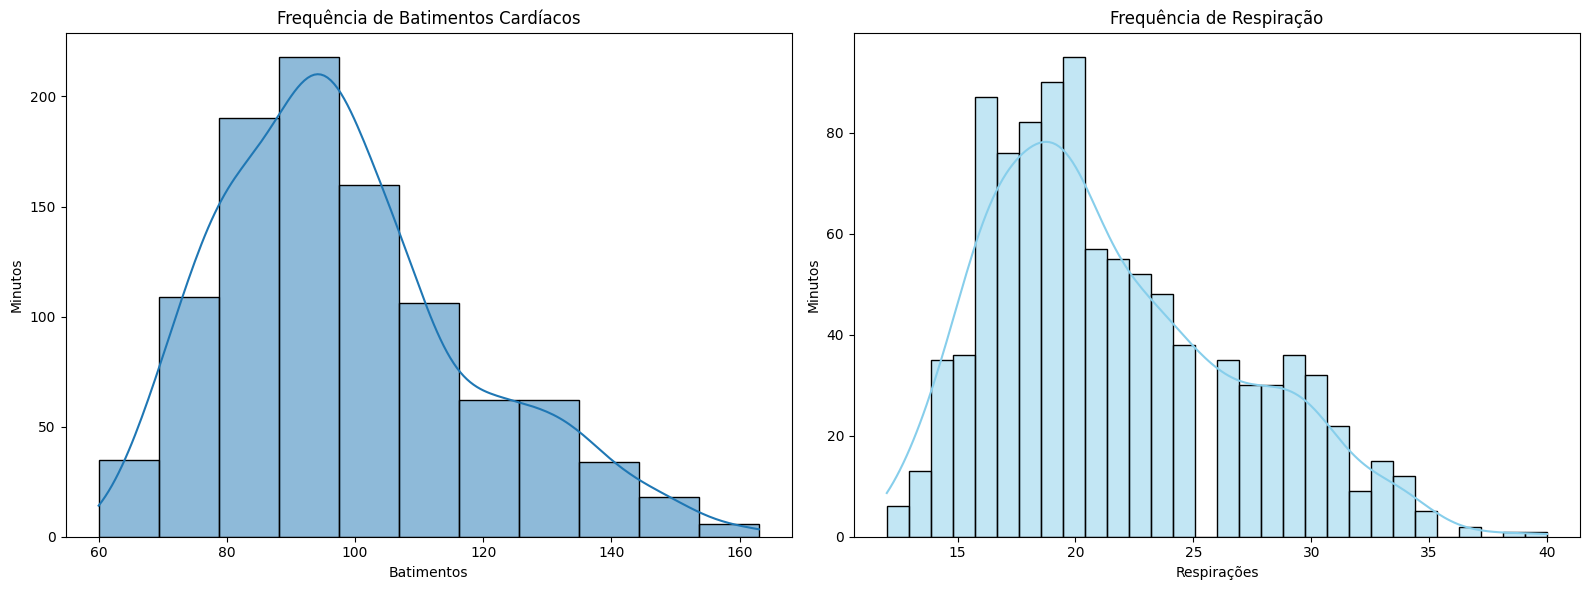

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['Heart_Rate'], bins=11, kde=True, ax=axes[0])
axes[0].set_title('Frequência de Batimentos Cardíacos')
axes[0].set_xlabel('Batimentos')
axes[0].set_ylabel('Minutos')

sns.histplot(df['Respiratory_Rate'], bins=30, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Frequência de Respiração')
axes[1].set_xlabel('Respirações')
axes[1].set_ylabel("Minutos")

plt.tight_layout()
plt.show()

A partir dos gráficos, ambos Gaussianos, pode-se analisar com maior facilidade a média de respiração e de batimentos cardíacos dos dados coletados, além de máximos e mínimos.

Além desse gráfico, pode-se criar outros para diferentes dados, como o de barras, por exemplo:

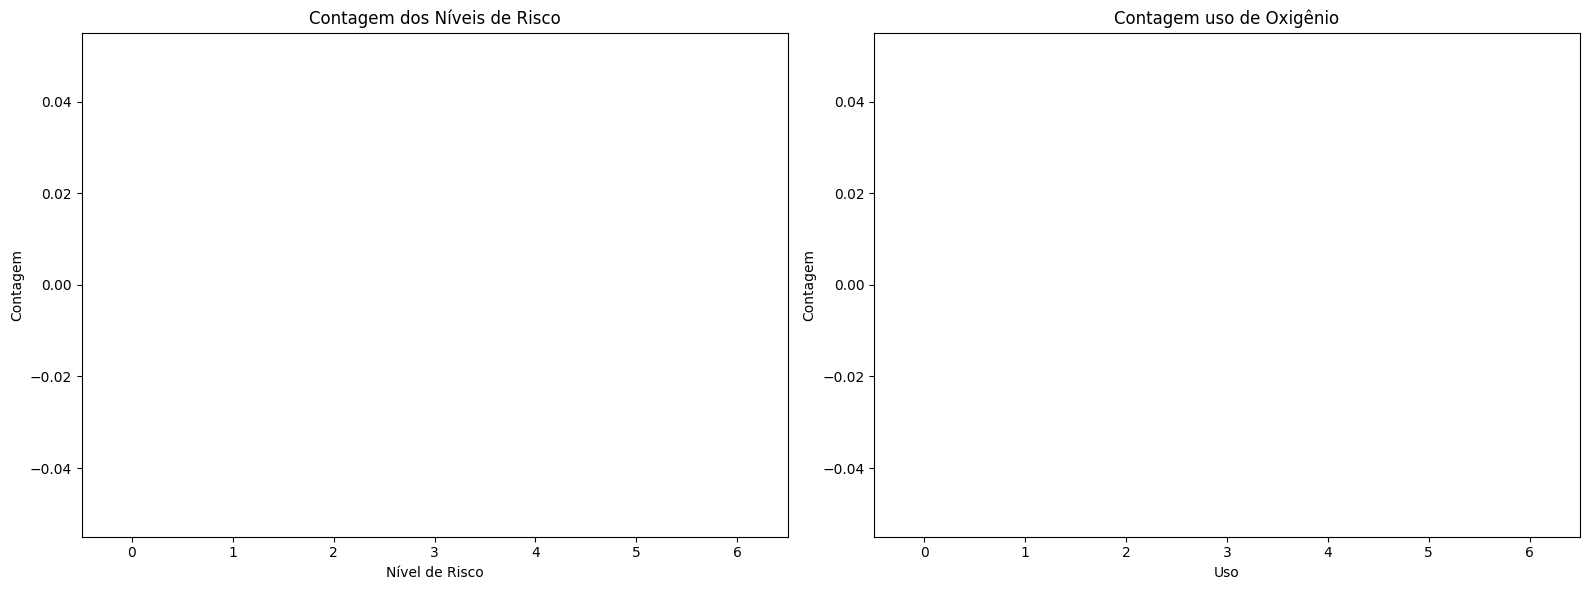

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

mapa_categoria = {
    1: 'Leve',
    2: 'Normal',
    3: 'Médio',
    4: 'Alto'
}

df['Risk_Level'] = df['Risk_Level'].map(mapa_categoria)
sns.countplot(x='Risk_Level', data=df, ax=axes[0], order=df['Risk_Level'].value_counts().index, legend=False)
axes[0].set_title('Contagem dos Níveis de Risco')
axes[0].set_xlabel('Nível de Risco')
axes[0].set_ylabel('Contagem')

sns.countplot(x='On_Oxygen', data=df, ax=axes[1], legend=False)
axes[1].set_title('Contagem uso de Oxigênio')
axes[1].set_xlabel('Uso')
axes[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

Passando os dados já otimizados para parquet:

In [23]:
df.to_parquet('Health_Risk_Dataset_Otimizado.parquet', index=False)

Verificando o tamanho do arquivo parquet:

In [24]:
df_parquet = pd.read_parquet('Health_Risk_Dataset_Otimizado.parquet')
df_parquet.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Respiratory_Rate   1000 non-null   uint8  
 1   Oxygen_Saturation  1000 non-null   uint8  
 2   O2_Scale           1000 non-null   int64  
 3   Systolic_BP        1000 non-null   int64  
 4   Heart_Rate         1000 non-null   int64  
 5   Temperature        1000 non-null   float64
 6   On_Oxygen          1000 non-null   bool   
 7   Risk_Level         1000 non-null   int64  
 8   A                  1000 non-null   bool   
 9   C                  1000 non-null   bool   
 10  P                  1000 non-null   bool   
 11  U                  1000 non-null   bool   
 12  V                  1000 non-null   bool   
dtypes: bool(6), float64(1), int64(4), uint8(2)
memory usage: 47.0 KB
